<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/Food_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import keras
import tensorflow as tf
import pandas as pd
import glob as gb
import os
import matplotlib.pyplot as plt
from random import randint
from keras.callbacks import EarlyStopping
from random import randint

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/dataset_food/Train',target_size=(500,500))
validation_set=train.flow_from_directory('/content/drive/MyDrive/dataset_food/Validate',target_size=(500,500))

Found 656 images belonging to 10 classes.
Found 1429 images belonging to 10 classes.


In [ ]:
training_set.class_indices


{'Banh beo': 0,
 'Banh bot loc': 1,
 'Banh can': 2,
 'Banh canh': 3,
 'Banh chung': 4,
 'Banh cuon': 5,
 'Banh duc': 6,
 'Banh gio': 7,
 'Banh khot': 8,
 'Banh mi': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(500,500,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 250, 250, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 62, 62, 64)      

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(training_set, epochs = 20, batch_size=120, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=80)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
21/21 [==============================] - 161s 8s/step - loss: 251.0562 - accuracy: 0.2134 - val_loss: 28.6006 - val_accuracy: 0.2246
Epoch 2/20
21/21 [==============================] - 41s 2s/step - loss: 33.0213 - accuracy: 0.3567 - val_loss: 289.8435 - val_accuracy: 0.0917
Epoch 3/20
21/21 [==============================] - 40s 2s/step - loss: 47.9539 - accuracy: 0.4055 - val_loss: 10.5512 - val_accuracy: 0.3240
Epoch 4/20
21/21 [==============================] - 40s 2s/step - loss: 12.0311 - accuracy: 0.5335 - val_loss: 134.0905 - val_accuracy: 0.1519
Epoch 5/20
21/21 [==============================] - 40s 2s/step - loss: 22.2270 - accuracy: 0.4268 - val_loss: 7.2651 - val_accuracy: 0.3954
Epoch 6/20
21/21 [==============================] - 40s 2s/step - loss: 20.6954 - accuracy: 0.5534 - val_loss: 19.8180 - val_accuracy: 0.2806
Epoch 7/20
21/21 [==============================] - 40s 2s/step - loss: 3.2208 - accuracy: 0.6616 - val_loss: 6.6846 - val_accuracy: 0.4787
Epoch

In [ ]:
model.save('CNN_food.h5')

In [ ]:
from keras.models import load_model
CNN_food =load_model('CNN_food.h5')

Sai số kiểm tra là:  17.469873428344727
Độ chính xác kiểm tra là:  0.49755072593688965


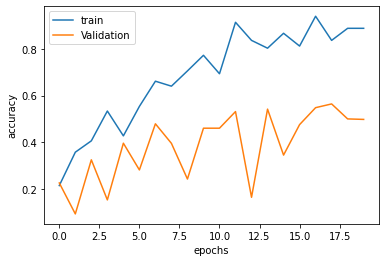

In [ ]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

9
Banh mi


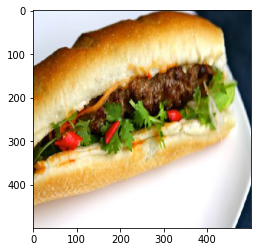

In [ ]:
img_path = '/content/drive/MyDrive/dataset_food/Test/43.jpg'
img=load_img(img_path,target_size=(500,500))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,500,500,3)
img=img.astype('float32')
img=img/255
food=np.argmax(CNN_food.predict(img))
pred = model.predict(img)
classes = ['Banh beo','Banh bot loc','Banh can','Banh canh','Banh chung','Banh cuon','Banh duc','Banh gio','Banh khot','Banh mi']
print(np.argmax(pred))
if food==0: print(classes[0])
elif food==1: print(classes[1])
elif food==2: print(classes[2])
elif food==3: print(classes[3])
elif food==4: print(classes[4])
elif food==5: print(classes[5])
elif food==6: print(classes[6])
elif food==7: print(classes[7])
elif food==8: print(classes[8])
elif food==9: print(classes[9])

5
Banh cuon


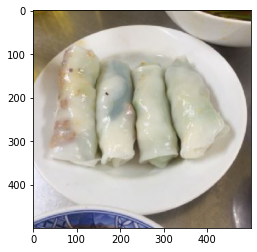

In [ ]:
img_path = '/content/drive/MyDrive/dataset_food/Test/69.jpg'
img=load_img(img_path,target_size=(500,500))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,500,500,3)
img=img.astype('float32')
img=img/255
food=np.argmax(CNN_food.predict(img))
pred = model.predict(img)
classes = ['Banh beo','Banh bot loc','Banh can','Banh canh','Banh chung','Banh cuon','Banh duc','Banh gio','Banh khot','Banh mi']
print(np.argmax(pred))
if food==0: print(classes[0])
elif food==1: print(classes[1])
elif food==2: print(classes[2])
elif food==3: print(classes[3])
elif food==4: print(classes[4])
elif food==5: print(classes[5])
elif food==6: print(classes[6])
elif food==7: print(classes[7])
elif food==8: print(classes[8])
elif food==9: print(classes[9])

4
Banh chung


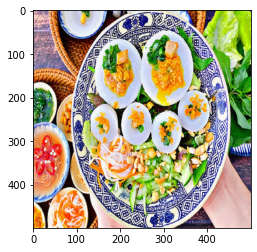

In [ ]:
img_path = '/content/drive/MyDrive/dataset_food/Test/9.jpg'
img=load_img(img_path,target_size=(500,500))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,500,500,3)
img=img.astype('float32')
img=img/255
food=np.argmax(CNN_food.predict(img))
pred = model.predict(img)
classes = ['Banh beo','Banh bot loc','Banh can','Banh canh','Banh chung','Banh cuon','Banh duc','Banh gio','Banh khot','Banh mi']
print(np.argmax(pred))
if food==0: print(classes[0])
elif food==1: print(classes[1])
elif food==2: print(classes[2])
elif food==3: print(classes[3])
elif food==4: print(classes[4])
elif food==5: print(classes[5])
elif food==6: print(classes[6])
elif food==7: print(classes[7])
elif food==8: print(classes[8])
elif food==9: print(classes[9])